<FONT size="60pt" color='Blue'> <center>RL_TP03</center></FONT>

### 🚦 Optimisation des Feux de Circulation avec l'Apprentissage par Renforcement

#### Objectif du TP  
Ce travail pratique vise à explorer **l’optimisation des feux de circulation** à l’aide de l’**apprentissage par renforcement**.

#### 📌 Les Étapes du TP  
1. 🔍 **Découverte de l’environnement**  
   - Simuler un **réseau routier** et analyser le **flux de trafic**.
  
2. 🤖 **Implémentation des algorithmes**  
   - Appliquer **Q-Learning** et **SARSA** pour apprendre une politique optimale.  

3. 📊 **Analyse et Comparaison**  
   - Comparer les performances des algorithmes à l’aide de **graphiques** et d’**évaluations quantitatives**.  

🚀 **Objectif final :** Trouver une stratégie efficace pour **minimiser les embouteillages** et améliorer la **fluidité du trafic** !  


In [3]:
import numpy as np

class TrafficEnvironment:
    def __init__(self):
        self.state = np.random.randint(0, 10, size=4)  # [North, South, East, West]
        self.current_light = 0  # 0: Green NS, 1: Green EW

    def step(self, action):
        if action == 1:
            self.current_light = 1 - self.current_light  # Switch lights

        if self.current_light == 0:
            passed = min(self.state[0], np.random.randint(1, 5)) + min(self.state[1], np.random.randint(1, 5))
            self.state[0] = max(0, self.state[0] - passed)
            self.state[1] = max(0, self.state[1] - passed)
        else:
            passed = min(self.state[2], np.random.randint(1, 5)) + min(self.state[3], np.random.randint(1, 5))
            self.state[2] = max(0, self.state[2] - passed)
            self.state[3] = max(0, self.state[3] - passed)

        new_cars = np.random.randint(0, 3, size=4)
        self.state += new_cars
        reward = passed
        return self.state, reward

    def reset(self):
        self.state = np.random.randint(0, 10, size=4)
        self.current_light = 0
        return self.state

# 🚦 Tester l'environnement sans fichier externe
env = TrafficEnvironment()
state = env.reset()
print("🚦 Initial Traffic Light Simulation 🚦")
print("State Format: [Cars North, Cars South, Cars East, Cars West]")
print("Actions: 0 = Keep Current Light, 1 = Switch Light")
print(f"Initial state: {state} (NS Green, EW Red)")

for i in range(10):
    action = np.random.choice([0, 1])  
    next_state, reward = env.step(action)
    light_status = "NS Green, EW Red" if env.current_light == 0 else "EW Green, NS Red"
    
    print(f"Step {i + 1}:")
    print(f" ➡ Action Taken: {action} ({'Switch' if action == 1 else 'Keep'})")
    print(f" 🚥 Light Status: {light_status}")
    print(f" 🏎 Cars State: {next_state}")
    print(f" 🎯 Reward (Cars Passed): {reward}")
    print("-" * 40)


🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [7 2 7 2] (NS Green, EW Red)
Step 1:
 ➡ Action Taken: 0 (Keep)
 🚥 Light Status: NS Green, EW Red
 🏎 Cars State: [2 1 9 2]
 🎯 Reward (Cars Passed): 6
----------------------------------------
Step 2:
 ➡ Action Taken: 1 (Switch)
 🚥 Light Status: EW Green, NS Red
 🏎 Cars State: [3 2 7 1]
 🎯 Reward (Cars Passed): 4
----------------------------------------
Step 3:
 ➡ Action Taken: 1 (Switch)
 🚥 Light Status: NS Green, EW Red
 🏎 Cars State: [2 0 7 3]
 🎯 Reward (Cars Passed): 4
----------------------------------------
Step 4:
 ➡ Action Taken: 1 (Switch)
 🚥 Light Status: EW Green, NS Red
 🏎 Cars State: [2 0 5 0]
 🎯 Reward (Cars Passed): 4
----------------------------------------
Step 5:
 ➡ Action Taken: 0 (Keep)
 🚥 Light Status: EW Green, NS Red
 🏎 Cars State: [3 0 1 0]
 🎯 Reward (Cars Passed): 4
--------------------------------------

In [4]:
env = TrafficEnvironment()
state = env.reset()

for _ in range(10):
    action = 0  # Garder le feu tel qu'il est
    next_state, reward = env.step(action)
    print(f"État : {next_state}, Récompense : {reward}")


État : [ 1  2 11  7], Récompense : 8
État : [ 2  2 12  9], Récompense : 3
État : [ 1  2 14 11], Récompense : 4
État : [ 0  2 16 11], Récompense : 3
État : [ 1  1 16 13], Récompense : 1
État : [ 2  2 16 14], Récompense : 2
État : [ 2  0 16 14], Récompense : 4
État : [ 2  0 17 15], Récompense : 2
État : [ 2  2 17 16], Récompense : 2
État : [ 2  1 17 18], Récompense : 2


*********************************************************************

In [5]:
import numpy as np
q_table = np.zeros((10, 10, 10, 10, 2))

print(q_table)

[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

Épisode 0, epsilon: 0.995, Reward: 157
Épisode 100, epsilon: 0.603, Reward: 152
Épisode 200, epsilon: 0.365, Reward: 169
Épisode 300, epsilon: 0.221, Reward: 163
Épisode 400, epsilon: 0.134, Reward: 165
Épisode 500, epsilon: 0.081, Reward: 158
Épisode 600, epsilon: 0.049, Reward: 162
Épisode 700, epsilon: 0.030, Reward: 159
Épisode 800, epsilon: 0.018, Reward: 171
Épisode 900, epsilon: 0.011, Reward: 159
🚦 Entraînement terminé !


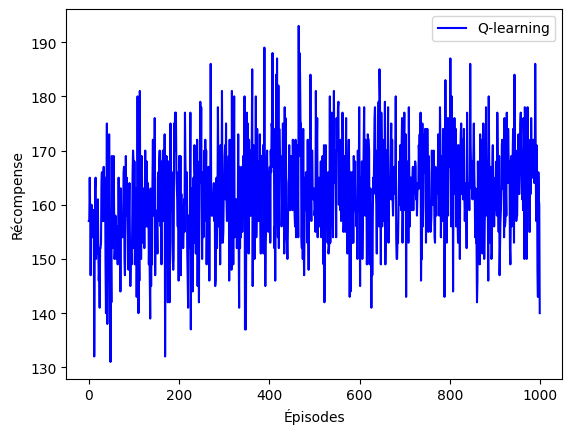

Q-table après entraînement:
[[[[[ 8.70391857  0.50152001]
    [ 1.28898963 11.94270082]
    [10.24045139  0.66397068]
    ...
    [ 0.          0.        ]
    [ 0.06982566  0.        ]
    [ 0.          0.        ]]

   [[11.5952311   0.99821174]
    [ 1.31461502 13.26968849]
    [ 3.4634198  14.92666033]
    ...
    [ 0.49504355  0.        ]
    [ 0.08709416  0.        ]
    [ 0.12086112  1.89971783]]

   [[ 1.16891028 12.86156466]
    [ 2.59644109 13.83962894]
    [ 3.41988375 15.84609845]
    ...
    [ 0.14781111  0.        ]
    [ 0.02124211  0.        ]
    [ 0.          1.22522503]]

   ...

   [[ 0.21523374  0.        ]
    [ 0.13552511  0.53528985]
    [ 0.2988056   0.        ]
    ...
    [ 0.04662     6.16320422]
    [ 0.10389823  1.56493209]
    [ 2.06687758  0.65392335]]

   [[ 0.          0.        ]
    [ 0.          1.39654845]
    [ 0.58421801  0.        ]
    ...
    [ 0.08184134  0.        ]
    [ 0.49674894  0.        ]
    [ 1.9652669   0.        ]]

   [[ 0.      

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):  
    q_learning_rewards = []  # ✅ Store total reward per episode

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))
        total_reward = 0  # ✅ Track total reward for this episode

        for step in range(50):  # Max steps per episode
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit

            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))
            total_reward += reward  # ✅ Accumulate reward

            # Update Q-table using Bellman equation
            best_next_action = np.argmax(q_table[next_state])  
            q_table[state + (action,)] += alpha * (reward + gamma * q_table[next_state + (best_next_action,)] - q_table[state + (action,)])

            state = next_state  

        q_learning_rewards.append(total_reward)  # ✅ Store episode reward
        epsilon = max(0.01, epsilon * decay)  # Decay epsilon

        if episode % 100 == 0:
            print(f"Épisode {episode}, epsilon: {epsilon:.3f}, Reward: {total_reward}")

    print("🚦 Entraînement terminé !")
    return q_table, q_learning_rewards  # ✅ Return both Q-table and rewards

# ✅ Train the model
env = TrafficEnvironment()
q_table, q_learning_rewards = train_q_learning(env, episodes=1000)

# ✅ Plot the learning curve
plt.plot(q_learning_rewards, label="Q-learning", color='b')
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.legend()
plt.show()

print("Q-table après entraînement:")
print(q_table)

### implimentation de SARSA 

In [7]:
import numpy as np
sarsa_table = np.zeros((10, 10, 10, 10, 2))

print(sarsa_table)

[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

In [9]:
def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    sarsa_rewards = []  # Stocker la récompense totale par épisode

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))
        total_reward = 0  # Suivre la récompense totale pour cet épisode

        # Choisir une action initiale
        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])  # Exploration
        else:
            action = np.argmax(sarsa_table[state])  # Exploitation

        for step in range(50):  # Nombre maximal d'étapes par épisode
            next_state, reward = env.step(action)
            next_state = tuple(np.clip(next_state, 0, 9))
            total_reward += reward  # Accumuler la récompense

            # Choisir la prochaine action
            if np.random.rand() < epsilon:
                next_action = np.random.choice([0, 1])  # Exploration
            else:
                next_action = np.argmax(sarsa_table[next_state])  # Exploitation

            # Mettre à jour la Q-table avec SARSA
            sarsa_table[state + (action,)] += alpha * (reward + gamma * sarsa_table[next_state + (next_action,)] - sarsa_table[state + (action,)])

            state = next_state
            action = next_action

        sarsa_rewards.append(total_reward)  # Stocker la récompense de l'épisode
        epsilon = max(0.01, epsilon * decay)  # Décroissance de epsilon

        if episode % 100 == 0:
            print(f"Épisode {episode}, epsilon: {epsilon:.3f}, Reward: {total_reward}")

    print("🚦 Entraînement SARSA terminé !")
    return sarsa_table, sarsa_rewards  # Retourner la Q-table et les récompenses

sarsa_table, sarsa_rewards = train_sarsa(env, episodes=1000)

Épisode 0, epsilon: 0.995, Reward: 146
Épisode 100, epsilon: 0.603, Reward: 156
Épisode 200, epsilon: 0.365, Reward: 166
Épisode 300, epsilon: 0.221, Reward: 165
Épisode 400, epsilon: 0.134, Reward: 171
Épisode 500, epsilon: 0.081, Reward: 157
Épisode 600, epsilon: 0.049, Reward: 157
Épisode 700, epsilon: 0.030, Reward: 165
Épisode 800, epsilon: 0.018, Reward: 175
Épisode 900, epsilon: 0.011, Reward: 173
🚦 Entraînement SARSA terminé !


- **visualiser l'apprentissage en comparant Q-learning et SARSA.**

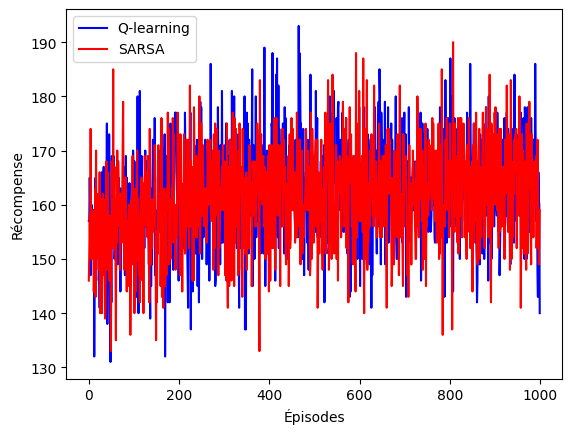

Q-table SARSA après entraînement:
[[[[[2.99301297e-01 9.27394168e+00]
    [1.04185512e+01 0.00000000e+00]
    [1.11916527e+01 4.52695701e-01]
    ...
    [2.70000000e-02 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 4.75980393e-01]]

   [[1.71072290e+00 1.10280689e+01]
    [1.19484895e+01 1.58320366e+00]
    [2.18285508e+00 1.38125925e+01]
    ...
    [6.75000000e-02 0.00000000e+00]
    [6.23174307e-01 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]]

   [[7.61129593e-01 1.11395875e+01]
    [3.15230355e+00 1.37535731e+01]
    [3.31079369e+00 1.55482396e+01]
    ...
    [5.26647281e-01 0.00000000e+00]
    [6.61383027e-02 6.22778969e-01]
    [7.80456622e-01 0.00000000e+00]]

   ...

   [[0.00000000e+00 2.00000000e-01]
    [1.04044656e+00 0.00000000e+00]
    [0.00000000e+00 5.15681241e+00]
    ...
    [0.00000000e+00 2.83753217e+00]
    [0.00000000e+00 1.40071860e+00]
    [7.83000000e-02 4.20412497e+00]]

   [[0.00000000e+00 0.00000000e+00]
    [0.00000000e+0

In [10]:
# Tracer la courbe d'apprentissage
plt.plot(q_learning_rewards, label="Q-learning", color='b')
plt.plot(sarsa_rewards, label="SARSA", color='r')
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.legend()
plt.show()

print("Q-table SARSA après entraînement:")
print(sarsa_table)

- **la courbe de la récompense moyenne pour les algorithmes Q-Learning et SARSA**

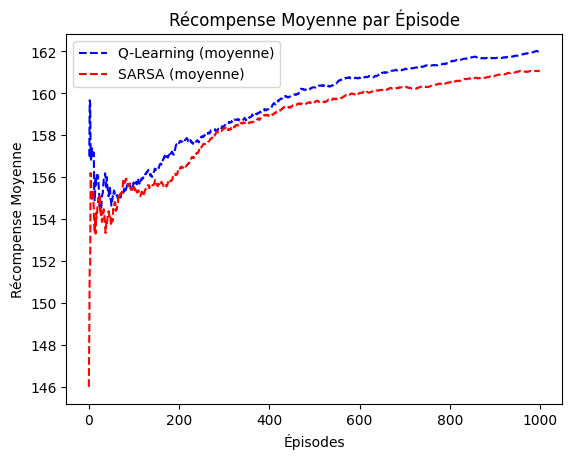

In [11]:
# Calculer la récompense moyenne pour Q-Learning et SARSA
q_learning_avg_rewards = [sum(q_learning_rewards[:i+1]) / (i+1) for i in range(len(q_learning_rewards))]
sarsa_avg_rewards = [sum(sarsa_rewards[:i+1]) / (i+1) for i in range(len(sarsa_rewards))]
# Tracer la récompense moyenne
plt.plot(q_learning_avg_rewards, label="Q-Learning (moyenne)", color='b', linestyle='--')
plt.plot(sarsa_avg_rewards, label="SARSA (moyenne)", color='r', linestyle='--')
plt.xlabel("Épisodes")
plt.ylabel("Récompense Moyenne")
plt.legend()
plt.title("Récompense Moyenne par Épisode")
plt.show()

- **visualiser l’évolution des récompenses maximales et minimales obtenues par Q-Learning et SARSA**

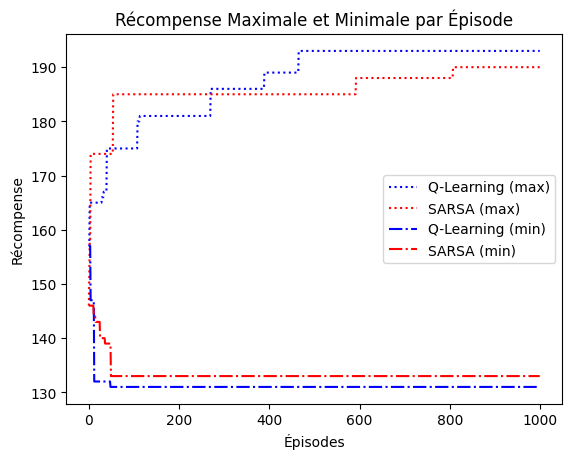

In [12]:
# Comparaison des récompenses maximales et minimales
q_learning_max_rewards = [max(q_learning_rewards[:i+1]) for i in range(len(q_learning_rewards))]
sarsa_max_rewards = [max(sarsa_rewards[:i+1]) for i in range(len(sarsa_rewards))]

q_learning_min_rewards = [min(q_learning_rewards[:i+1]) for i in range(len(q_learning_rewards))]
sarsa_min_rewards = [min(sarsa_rewards[:i+1]) for i in range(len(sarsa_rewards))]

plt.plot(q_learning_max_rewards, label="Q-Learning (max)", color='b', linestyle=':')
plt.plot(sarsa_max_rewards, label="SARSA (max)", color='r', linestyle=':')
plt.plot(q_learning_min_rewards, label="Q-Learning (min)", color='b', linestyle='-.')
plt.plot(sarsa_min_rewards, label="SARSA (min)", color='r', linestyle='-.')
plt.xlabel("Épisodes")
plt.ylabel("Récompense")
plt.legend()
plt.title("Récompense Maximale et Minimale par Épisode")
plt.show()

- **affiche les meilleures politiques apprises par Q-Learning et SARSA**

In [13]:
# Affichage des meilleures politiques apprises
def get_best_policy(q_table):
    policy = np.zeros((10, 10, 10, 10), dtype=int)
    for i in range(10):
        for j in range(10):
            for k in range(10):
                for l in range(10):
                    policy[i, j, k, l] = np.argmax(q_table[i, j, k, l])
    return policy

best_policy_q_learning = get_best_policy(q_table)
best_policy_sarsa = get_best_policy(sarsa_table)

print("Meilleure politique apprise par Q-Learning :")
print(best_policy_q_learning)

print("Meilleure politique apprise par SARSA :")
print(best_policy_sarsa)

Meilleure politique apprise par Q-Learning :
[[[[0 1 0 ... 0 0 0]
   [0 1 1 ... 0 0 1]
   [1 1 1 ... 0 0 1]
   ...
   [0 1 0 ... 1 1 0]
   [0 1 0 ... 0 0 0]
   [0 0 1 ... 0 1 1]]

  [[0 0 1 ... 0 0 0]
   [0 0 1 ... 0 0 0]
   [0 0 1 ... 0 0 0]
   ...
   [0 1 0 ... 0 0 0]
   [0 0 0 ... 0 0 1]
   [0 1 0 ... 1 0 1]]

  [[1 0 1 ... 1 0 0]
   [1 0 0 ... 0 0 0]
   [1 1 1 ... 1 0 0]
   ...
   [0 1 1 ... 1 0 0]
   [0 0 0 ... 0 0 1]
   [0 0 0 ... 0 0 1]]

  ...

  [[0 0 0 ... 0 0 0]
   [0 1 0 ... 0 0 0]
   [0 1 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 1 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 1 ... 0 0 0]
   [0 1 1 ... 0 0 0]
   [1 1 1 ... 1 0 0]
   ...
   [0 0 0 ... 1 0 1]
   [1 1 0 ... 1 0 0]
   [1 1 1 ... 1 0 1]]

 

- <span style='color:red'>**Comparaison finale des performances entre Q-Learning et SARSA**</spane>

In [14]:
final_q_learning_reward = np.mean(q_learning_rewards[-100:])  # Moyenne des 100 derniers épisodes
final_sarsa_reward = np.mean(sarsa_rewards[-100:])  # Moyenne des 100 derniers épisodes
print(f"Récompense finale moyenne (Q-Learning) : {final_q_learning_reward}")
print(f"Récompense finale moyenne (SARSA) : {final_sarsa_reward}")

if final_q_learning_reward > final_sarsa_reward:
    print("Q-Learning a performé mieux que SARSA.")
elif final_q_learning_reward < final_sarsa_reward:
    print("SARSA a performé mieux que Q-Learning.")
else:
    print("Q-Learning et SARSA ont performé de manière similaire.")

Récompense finale moyenne (Q-Learning) : 164.57
Récompense finale moyenne (SARSA) : 163.05
Q-Learning a performé mieux que SARSA.
